In [1]:
import pandas as pd
import numpy as np


In [2]:
# import data 
df_features = pd.read_csv('data/elliptic_txs_features.csv', header=None)
df_edges = pd.read_csv("data/elliptic_txs_edgelist.csv")
df_classes =  pd.read_csv("data/elliptic_txs_classes.csv")

df_classes['class'] = df_classes['class'].map({'unknown': 2, '1':1, '2':0})

# merging dataframes
df_merge = df_features.merge(df_classes, how='left', right_on="txId", left_on=0)
df_merge.drop(0, axis=1, inplace=True)

# check if there are duplicate txId
print("Number of duplicate txId: ", df_merge.duplicated(subset=['txId']).sum())

Number of duplicate txId:  0


#### Read the outputs from oddball

In [3]:
res = pd.read_csv('oddball/converted_data/result/output.txt', names=['txId', 'score'], sep=' ')
res['label'] = res.txId.apply(lambda x: df_merge[df_merge.txId == x]['class'].values[0])
res

,txId,score,label
0,309974683,15.430379,2
1,309975241,15.312682,2
2,309974676,14.495553,2
3,245270528,13.899769,2
4,244763077,13.514071,2
...,...,...,...
203764,200982505,0.010394,2
203765,339078465,0.010394,2
203766,201959467,0.010394,2
203767,188708874,0.010394,2


In [6]:
res_labeled = res[res.label == 1].reset_index(drop=True)
# res_labeled = res[res.label != 2].reset_index(drop=True)
res_labeled

,txId,score,label
0,355110272,3.659937,1
1,30179316,3.240772,1
2,100074684,2.836916,1
3,269905671,2.405536,1
4,70023047,2.391142,1
...,...,...,...
4540,339094200,0.010394,1
4541,339057317,0.010394,1
4542,339057690,0.010394,1
4543,339964553,0.010394,1


In [9]:
import networkx as nx
import matplotlib.pyplot as plt

def visualize_anomaly_graph(edge_df):

    graph = nx.from_pandas_edgelist(edge_df, source='txId1', target='txId2')
    # graph = nx.from_pandas_edgelist(one_hop_edge)
    pos = nx.spring_layout(graph)

    class_labels = {}
    for node in graph.nodes():
        label = res[res.txId == node]['label'].values[0]
        class_labels[node] = label
    class_colors = {1: 'red', 0: 'blue', 2: 'green'}
    node_colors = [class_colors[class_labels[node]] for node in graph.nodes()]

    nx.draw(graph, with_labels=False, pos=pos, node_color=node_colors)

    plt.show()

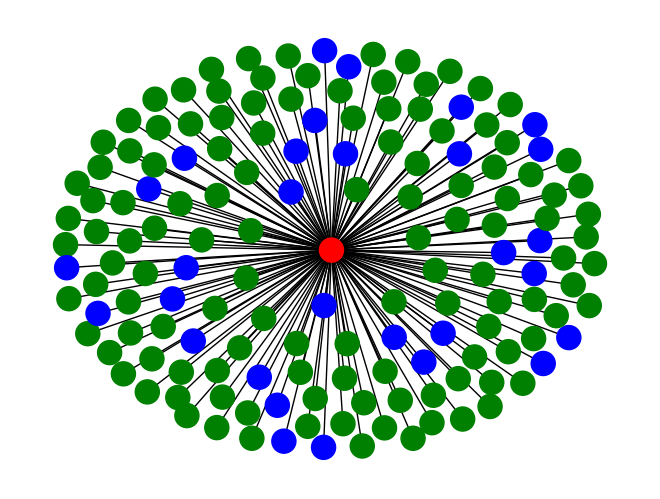

In [34]:
selected_node = res_labeled.txId[0]
one_hop_edge = df_edges[(df_edges.txId1 == selected_node)|(df_edges.txId2 == selected_node)]
visualize_anomaly_graph(one_hop_edge)

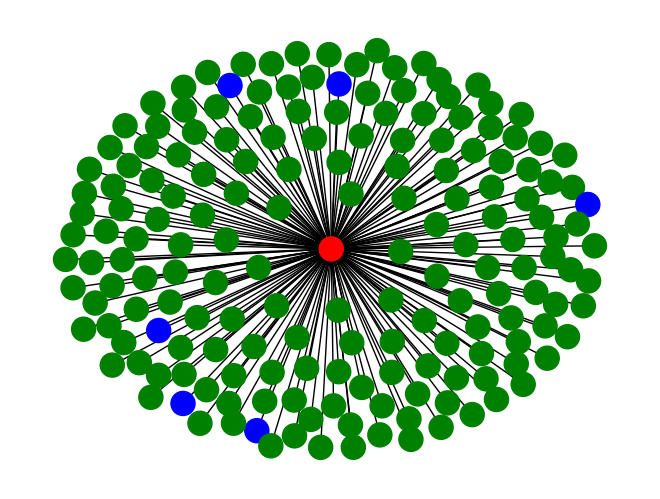

In [35]:
selected_node = res_labeled.txId[1]
one_hop_edge = df_edges[(df_edges.txId1 == selected_node)|(df_edges.txId2 == selected_node)]
visualize_anomaly_graph(one_hop_edge)

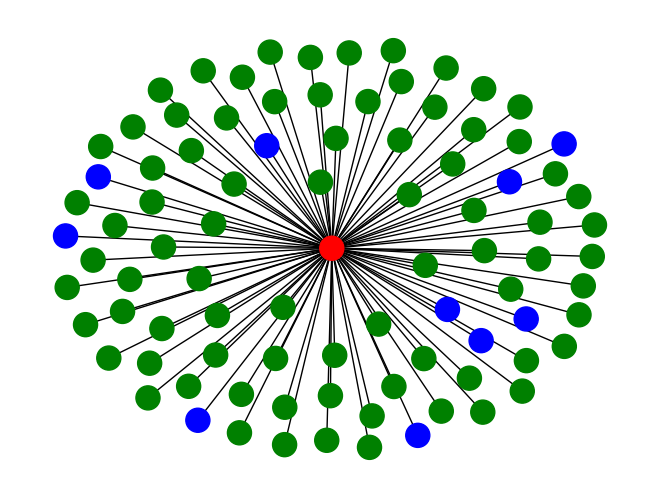

In [36]:
selected_node = res_labeled.txId[2]
one_hop_edge = df_edges[(df_edges.txId1 == selected_node)|(df_edges.txId2 == selected_node)]
visualize_anomaly_graph(one_hop_edge)

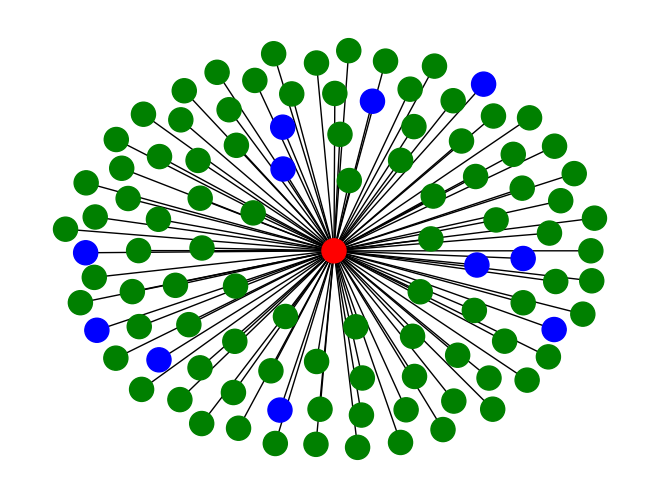

In [37]:
selected_node = res_labeled.txId[3]
one_hop_edge = df_edges[(df_edges.txId1 == selected_node)|(df_edges.txId2 == selected_node)]
visualize_anomaly_graph(one_hop_edge)

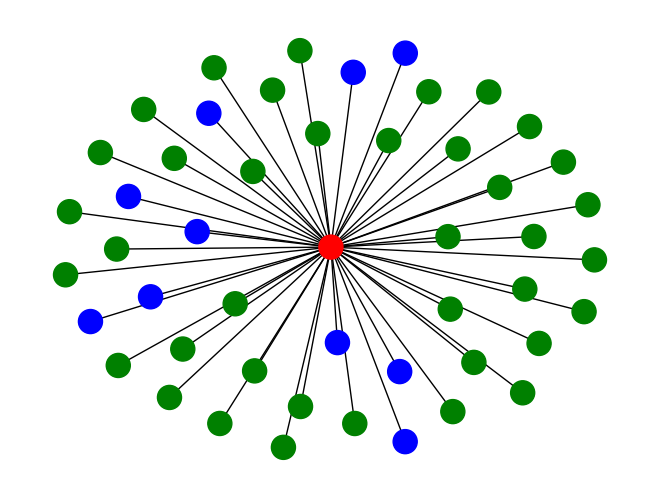

In [38]:
selected_node = res_labeled.txId[4]
one_hop_edge = df_edges[(df_edges.txId1 == selected_node)|(df_edges.txId2 == selected_node)]
visualize_anomaly_graph(one_hop_edge)

#### Check the degree of nodes

In [12]:
total_graph = nx.from_pandas_edgelist(df_edges, source='txId1', target='txId2')
pos = nx.spring_layout(total_graph)

# selected_node = res_labeled.txId[4]
# one_hop_edge = df_edges[(df_edges.txId1 == selected_node)|(df_edges.txId2 == selected_node)]

selected_node = res_labeled.txId[4]
one_hop_edge = df_edges[(df_edges.txId1 == selected_node)|(df_edges.txId2 == selected_node)]
visualize_anomaly_graph(one_hop_edge)

# class_labels = {}
# for node in total_graph.nodes():
#     label = res[res.txId == node]['label'].values[0]
#     class_labels[node] = label
# class_colors = {1: 'red', 0: 'blue', 2: 'green'}
# node_colors = [class_colors[class_labels[node]] for node in total_graph.nodes()]

# nx.draw(total_graph, with_labels=False, pos=pos, node_color=node_colors)

# plt.show()

Node 2984918 has degree 473


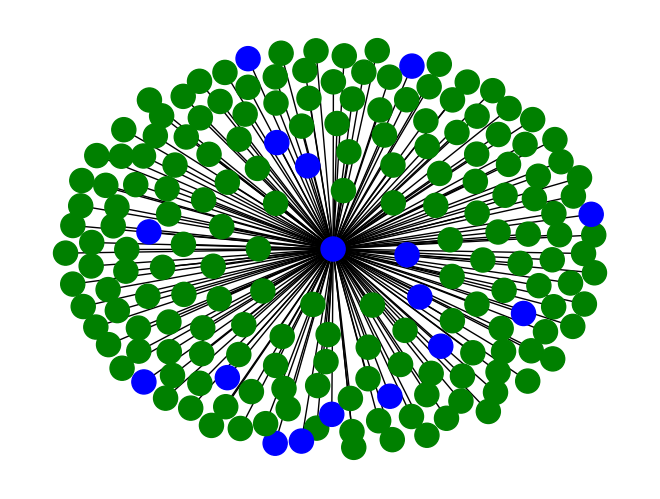

In [33]:
degrees = dict(total_graph.degree())
sorted_nodes = sorted(degrees, key=degrees.get, reverse=True)

print(f"Node {sorted_nodes[0]} has degree {degrees[sorted_nodes[0]]}")

selected_node = sorted_nodes[9]
one_hop_edge = df_edges[(df_edges.txId1 == selected_node)|(df_edges.txId2 == selected_node)]
visualize_anomaly_graph(one_hop_edge)
